In [1]:
import pandas as pd
import numpy as np

# Introduction

## COVID data

In [2]:
covid_data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
covid_data.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


<AxesSubplot:title={'center':'COVID-19: Daily new cases'}, xlabel='date'>

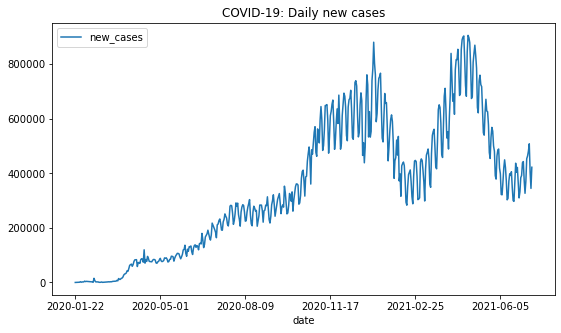

In [3]:
covid_data[(covid_data['location']=='World')].plot(x='date', y='new_cases', title='COVID-19: Daily new cases', figsize=(9, 5))

In [4]:
def covid_daily(ax):
    covid_data[(covid_data['location']=='World')].plot(x='date', y='new_cases', title='COVID-19: Daily new cases', figsize=(9, 5), ax=ax)

In [5]:
from matplotlib import pyplot as plt

def pretty_plot(chart, save=False):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

    chart(ax)
    ax.get_legend().remove()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if save:
        fig = ax.get_figure()
        fig.savefig(f'{chart.__name__}.png')

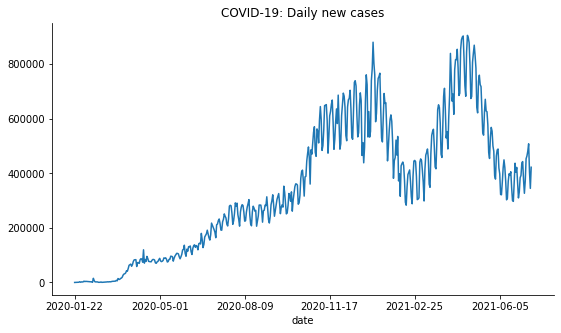

In [6]:
pretty_plot(covid_daily, save=True)

## Airline

In [6]:
#!pip install sktime
from sktime.datasets import load_airline

<AxesSubplot:xlabel='Period'>

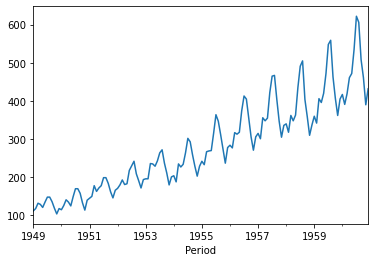

In [7]:
load_airline().plot()

## (Gaussian) white noise

In [8]:
white_noise_data = pd.DataFrame({'Z': np.random.normal(loc=0.0, scale=10.0, size=500)})

def white_noise(ax=None):
    white_noise_data.plot(title='Gaussian white noise', figsize=(9, 5), ax = ax)

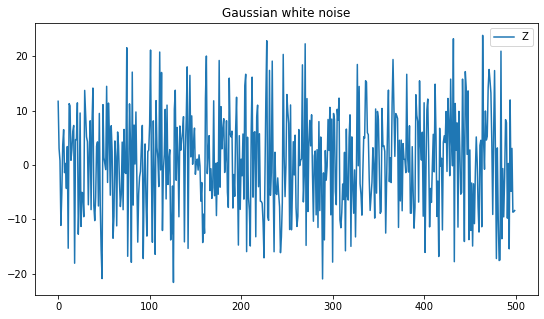

In [9]:
white_noise()

<AxesSubplot:>

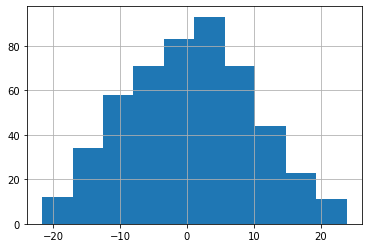

In [10]:
white_noise_data['Z'].hist()

In [11]:
#!pip install pingouin
import pingouin as pg

In [12]:
# https://pingouin-stats.org/generated/pingouin.normality.html
pg.normality(white_noise_data['Z'])

,W,pval,normal
Z,0.992702,0.015422,False


/Users/nick/opt/anaconda3/envs/ambient_pop/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
